In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
*df.shape, \
    df.columns

(878049,
 9,
 Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
        'Resolution', 'Address', 'X', 'Y'],
       dtype='object'))

In [4]:
df.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [5]:
var_name_map = {
    'X': 'longitude', 
    'Y': 'latitude',
    'Dates': 'date',
    'Category': 'category',
    'Descript': 'description',
    'PdDistrict': 'pd_district',
    'Resolution': 'resolution',
    'Address': 'address',
    'DayOfWeek': 'day_of_week'
}

df.rename(columns=var_name_map, inplace=True)
df.columns

Index(['date', 'category', 'description', 'day_of_week', 'pd_district',
       'resolution', 'address', 'longitude', 'latitude'],
      dtype='object')

In [6]:
df.describe(include='all')

,date,category,description,day_of_week,pd_district,resolution,address,longitude,latitude
count,878049,878049,878049,878049,878049,878049,878049,878049.000000,878049.000000
unique,389257,39,879,7,10,17,23228,NaN,NaN
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN
freq,185,174900,60022,133734,157182,526790,26533,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.422616,37.771020
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030354,0.456893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.432952,37.752427
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.416420,37.775421
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-122.406959,37.784369


In [7]:
df.isna().sum()

date           0
category       0
description    0
day_of_week    0
pd_district    0
resolution     0
address        0
longitude      0
latitude       0
dtype: int64

In [8]:
print(f'Duplicated rows percentage: {df.duplicated().sum() / df.shape[0]}')

duplicated = df[df.duplicated() == True]
f'Duplicated num: {duplicated.shape[0]}'

Duplicated rows percentage: 0.002645638227479332


'Duplicated num: 2323'

In [9]:
df = df.drop_duplicates(keep='last')

In [10]:
# number of unique values per variable
[ (var_name, len(df[var_name].unique())) for var_name in df.columns ]

[('date', 389257),
 ('category', 39),
 ('description', 879),
 ('day_of_week', 7),
 ('pd_district', 10),
 ('resolution', 17),
 ('address', 23228),
 ('longitude', 34243),
 ('latitude', 34243)]

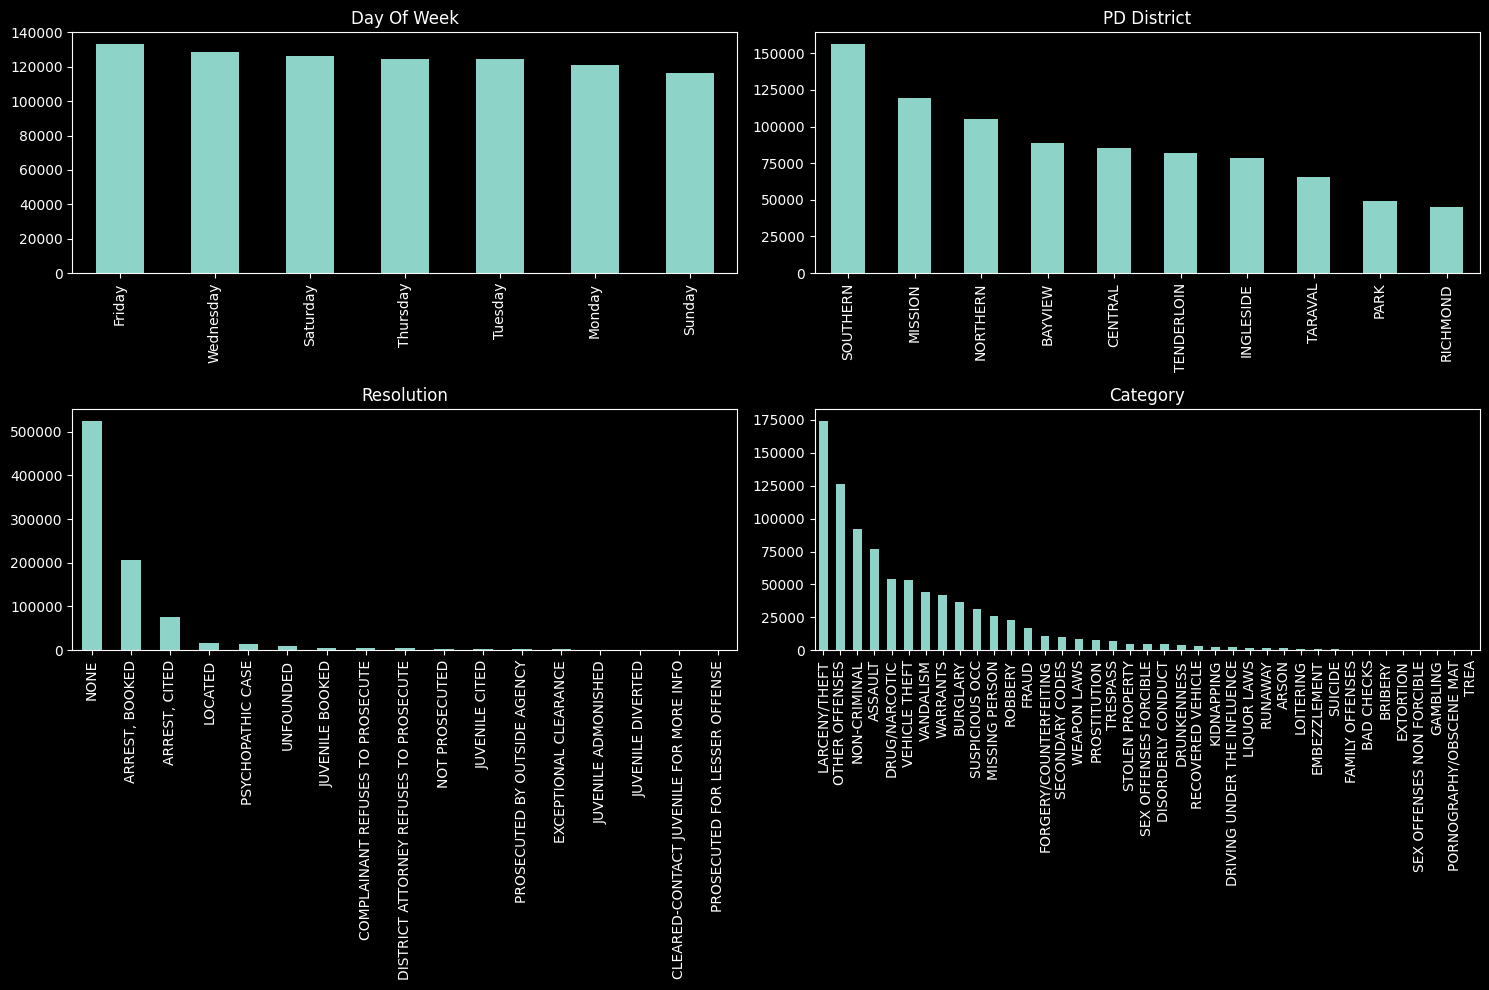

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10), tight_layout=True)


ax[0][0].set_title('Day Of Week')
df.day_of_week.value_counts().plot.bar(ax=ax[0][0])

ax[0][1].set_title('PD District')
df.pd_district.value_counts().plot.bar(ax=ax[0][1])

ax[1][0].set_title('Resolution')
df.resolution.value_counts().plot.bar(ax=ax[1][0])

ax[1][1].set_title('Category')
df.category.value_counts().plot.bar(ax=ax[1][1])

plt.show()

In [12]:
address_cnts = df.address.value_counts(sort=True)
address_cnts

800 Block of BRYANT ST           26245
800 Block of MARKET ST            6576
2000 Block of MISSION ST          5094
1000 Block of POTRERO AV          4046
900 Block of MARKET ST            3245
                                 ...  
INTERSTATE280 HY / OCEAN AV          1
23RD ST / GRANDVIEW AV               1
100 Block of RICKARD ST              1
MILTON I ROSS ST / JERROLD AV        1
19TH ST / 3RD ST                     1
Name: address, Length: 23228, dtype: int64

In [13]:
thres = sum(list(address_cnts[:100])) / 100
thres

1587.85

In [14]:
top_address_cnts = address_cnts.loc[address_cnts >= thres]
len(top_address_cnts), len(address_cnts.unique())

(24, 578)

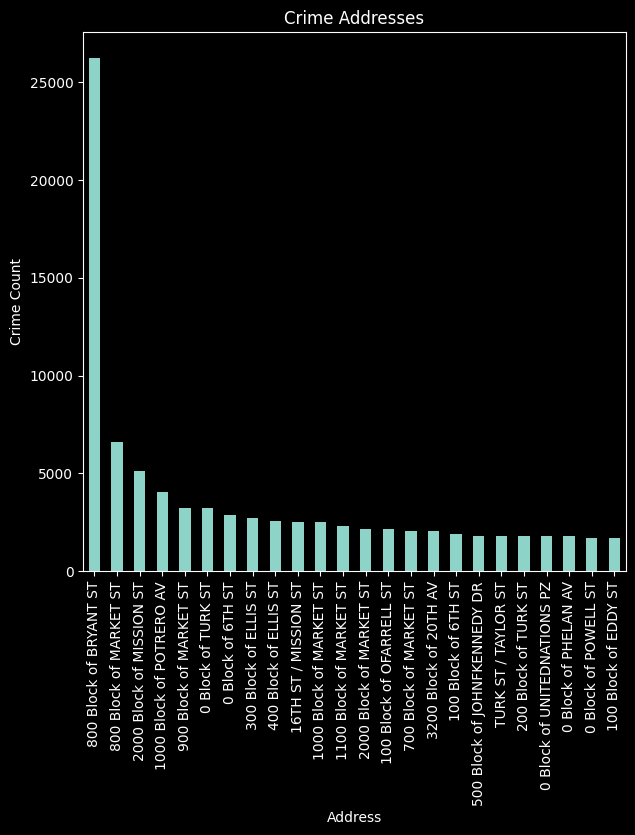

In [15]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))

top_address_cnts.plot.bar(ax=ax, rot=90)
ax.set_title('Crime Addresses')
ax.set_xlabel('Address')
ax.set_ylabel('Crime Count')

plt.show()

In [16]:
address_dict = dict()

for address in df.address.values:
    address_type = address[-2:]
    if address_type in address_dict:
        address_dict[address_type] += 1
    else:
        address_dict[address_type] = 0

address_dict_sorted = { k: v for k, v in sorted(address_dict.items(), key=lambda item: item[1], reverse=True) }

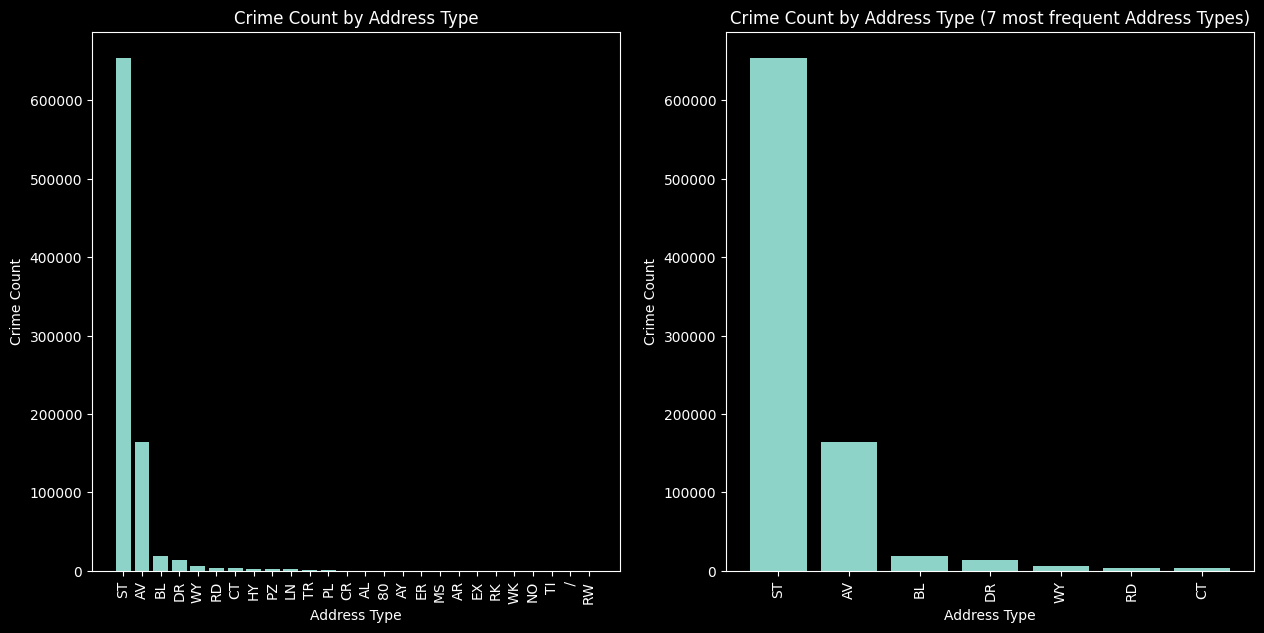

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].bar(range(len(address_dict_sorted)), list(address_dict_sorted.values()), align='center')
ax[0].set_xticks(range(len(address_dict_sorted)), list(address_dict_sorted.keys()), rotation=90)
ax[0].set_title('Crime Count by Address Type')
ax[0].set_xlabel('Address Type')
ax[0].set_ylabel('Crime Count')

top_n = 7

ax[1].bar(range(top_n), list(address_dict_sorted.values())[:top_n], align='center')
ax[1].set_xticks(range(top_n), list(address_dict_sorted.keys())[:top_n], rotation=90)
ax[1].set_title(f'Crime Count by Address Type ({top_n} most frequent Address Types)')
ax[1].set_xlabel('Address Type')
ax[1].set_ylabel('Crime Count')

plt.show()

In [18]:
f'{len(address_dict_sorted)=}', f'{len(df.address.value_counts())=}'

('len(address_dict_sorted)=26', 'len(df.address.value_counts())=23228')

In [19]:
df['address_type'] = df.address.apply(lambda x : x[-2:])
df.drop(columns=['address'], axis=1, inplace=True)

In [20]:
df.date[:5]

0    2015-05-13 23:53:00
1    2015-05-13 23:53:00
2    2015-05-13 23:33:00
3    2015-05-13 23:30:00
4    2015-05-13 23:30:00
Name: date, dtype: object

In [21]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['date'][:5]

0   2015-05-13 23:53:00
1   2015-05-13 23:53:00
2   2015-05-13 23:33:00
3   2015-05-13 23:30:00
4   2015-05-13 23:30:00
Name: date, dtype: datetime64[ns]

In [22]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_month'] = df['date'].dt.day
df['time'] = df['date'].dt.time

In [23]:
def extract_season(month):
    if month in [4, 5, 6]:
        return 'summer'.upper()
    elif month in [7, 8, 9]:
        return 'rainy'.upper()
    elif month in [10, 11, 12]:
        return 'winter'.upper()
    return 'spring'.upper()

In [24]:
df['season'] = df['month'].apply(lambda x: extract_season(x))

In [25]:
df.drop(['date'], axis=1, inplace=True)

In [26]:
df['hour'] = df['time'].apply(lambda x: x.hour)
df['minute'] = df['time'].apply(lambda x: x.minute)

In [27]:
df.drop(['time'], axis=1, inplace=True)

In [28]:
df.head()

,category,description,day_of_week,pd_district,resolution,longitude,latitude,address_type,year,month,day_of_month,season,hour,minute
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,ST,2015,5,13,SUMMER,23,53
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,ST,2015,5,13,SUMMER,23,53
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",-122.424363,37.800414,ST,2015,5,13,SUMMER,23,33
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,-122.426995,37.800873,ST,2015,5,13,SUMMER,23,30
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,-122.438738,37.771541,ST,2015,5,13,SUMMER,23,30


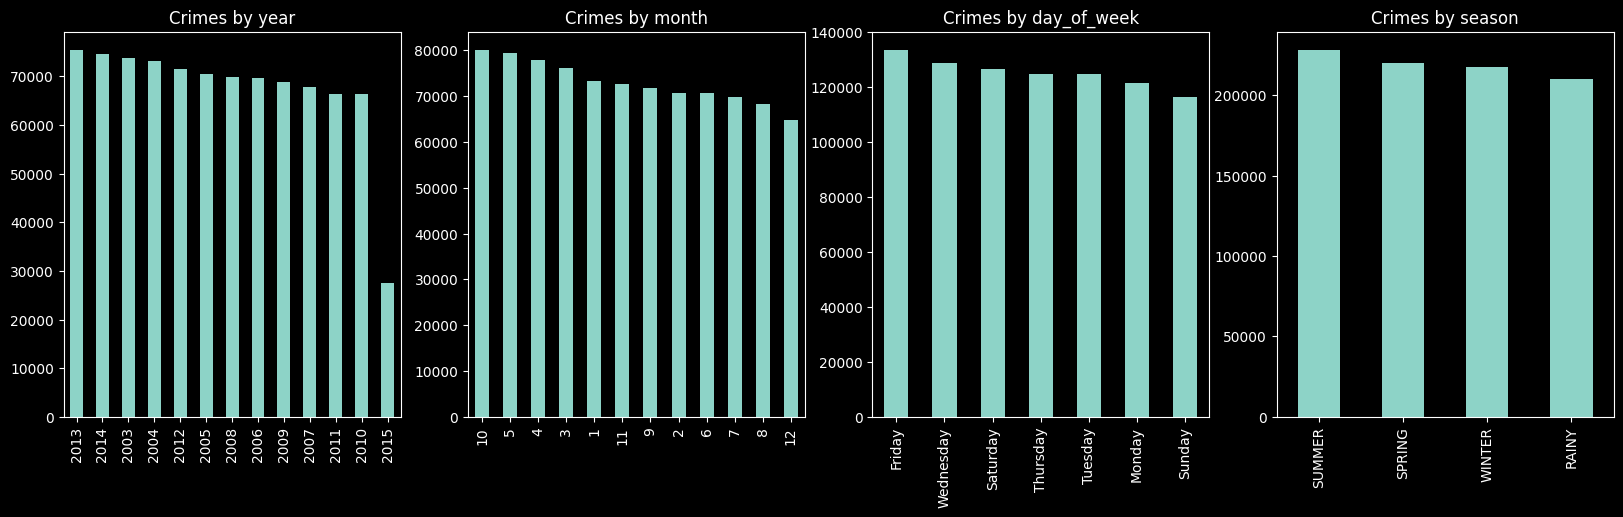

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for var_name, ax_i in zip(['year', 'month', 'day_of_week', 'season'], ax.flatten()):
    df.get(var_name).value_counts(sort=True).plot.bar(ax=ax_i)
    ax_i.set_title(f'Crimes by {var_name}')

plt.show()

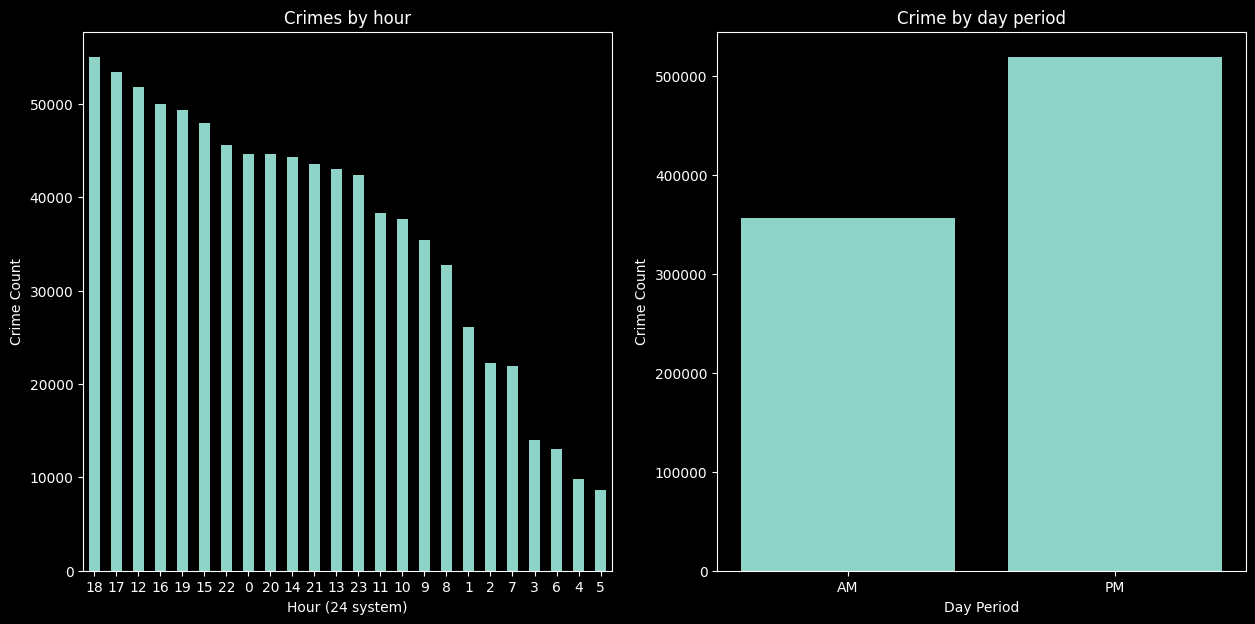

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].set_title('Crimes by hour')
df.hour.value_counts(sort=True).plot.bar(ax=ax[0], rot=0)
ax[0].set_xlabel('Hour (24 system)')
ax[0].set_ylabel('Crime Count')

hour_type_dict = { 'AM': 0, 'PM': 0 }
for hour in df.hour.values:
    if hour <= 12:
        hour_type_dict['AM'] += 1
    else:
        hour_type_dict['PM'] += 1

ax[1].bar(range(len(hour_type_dict)), list(hour_type_dict.values()), align='center')
ax[1].set_xticks(range(len(hour_type_dict)), list(hour_type_dict.keys()), rotation=0)
ax[1].set_title('Crime by day period')
ax[1].set_xlabel('Day Period')
ax[1].set_ylabel('Crime Count')

plt.show()

In [31]:
def extract_hour_type(hour):
    if hour in range(4, 12):
        return 'MORNING'
    elif hour in range(12, 15):
        return 'NOON'
    elif hour in range(15, 18):
        return 'EVENING'
    elif hour in range(18, 22):
        return 'NIGHT'
    return 'MID-NIGHT'

In [32]:
df['hour_type'] = df['hour'].apply(lambda x : extract_hour_type(x))

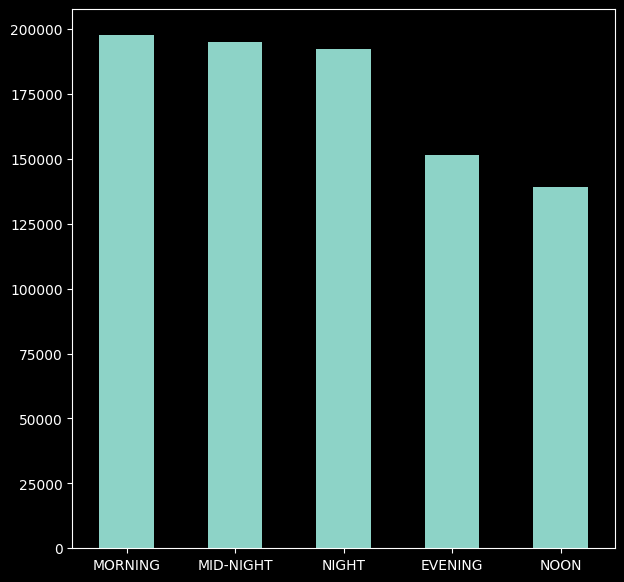

In [33]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))

df.hour_type.value_counts().plot.bar(ax=ax, rot=0)

plt.show()

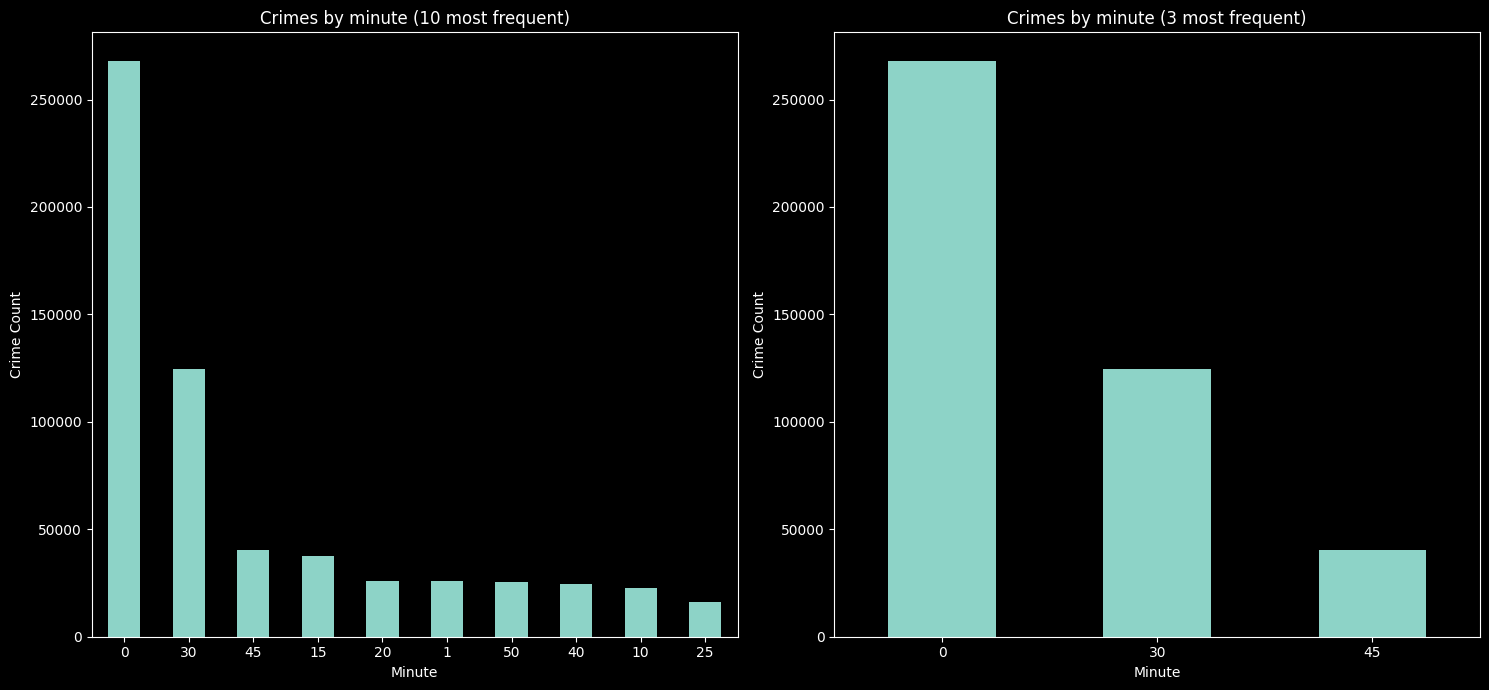

In [34]:
_, ax = plt.subplots(1, 2, figsize=(15, 7), tight_layout=True)

top_n = 10
vals = df.minute.value_counts(sort=True)[:top_n]

ax[0].set_title(f'Crimes by minute ({top_n} most frequent)')
vals.plot.bar(ax=ax[0], rot=0)
ax[0].set_xlabel('Minute')
ax[0].set_ylabel('Crime Count')

top_n = 3
ax[1].set_title(f'Crimes by minute ({top_n} most frequent)')
ax[1] = vals[:top_n].plot.bar(ax=ax[1], rot=0)
ax[1].set_xlabel('Minute')
ax[1].set_ylabel('Crime Count')

plt.show()

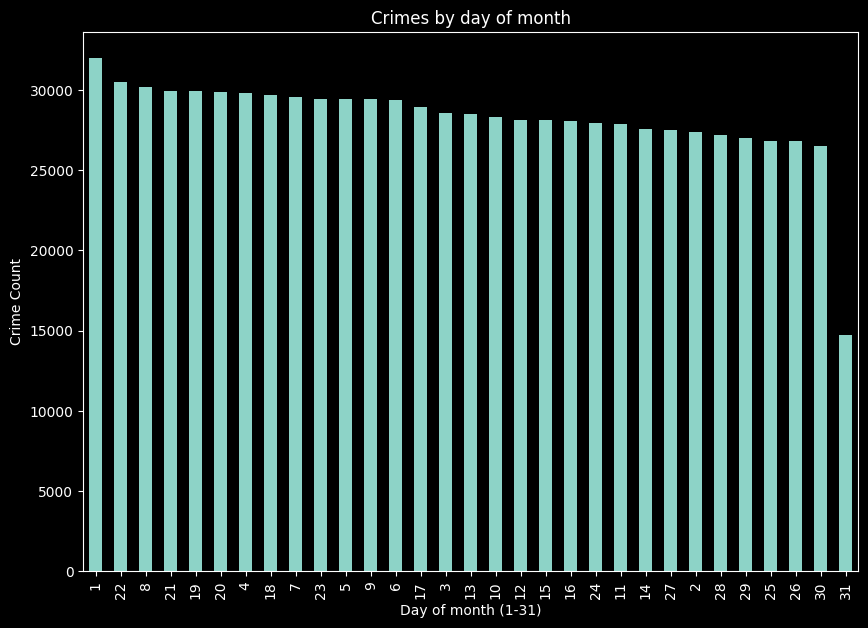

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

ax.set_title('Crimes by day of month')
df.day_of_month.value_counts(sort=True).plot.bar(ax=ax, rot=90)

ax.set_xlabel('Day of month (1-31)')
ax.set_ylabel('Crime Count')

plt.show()

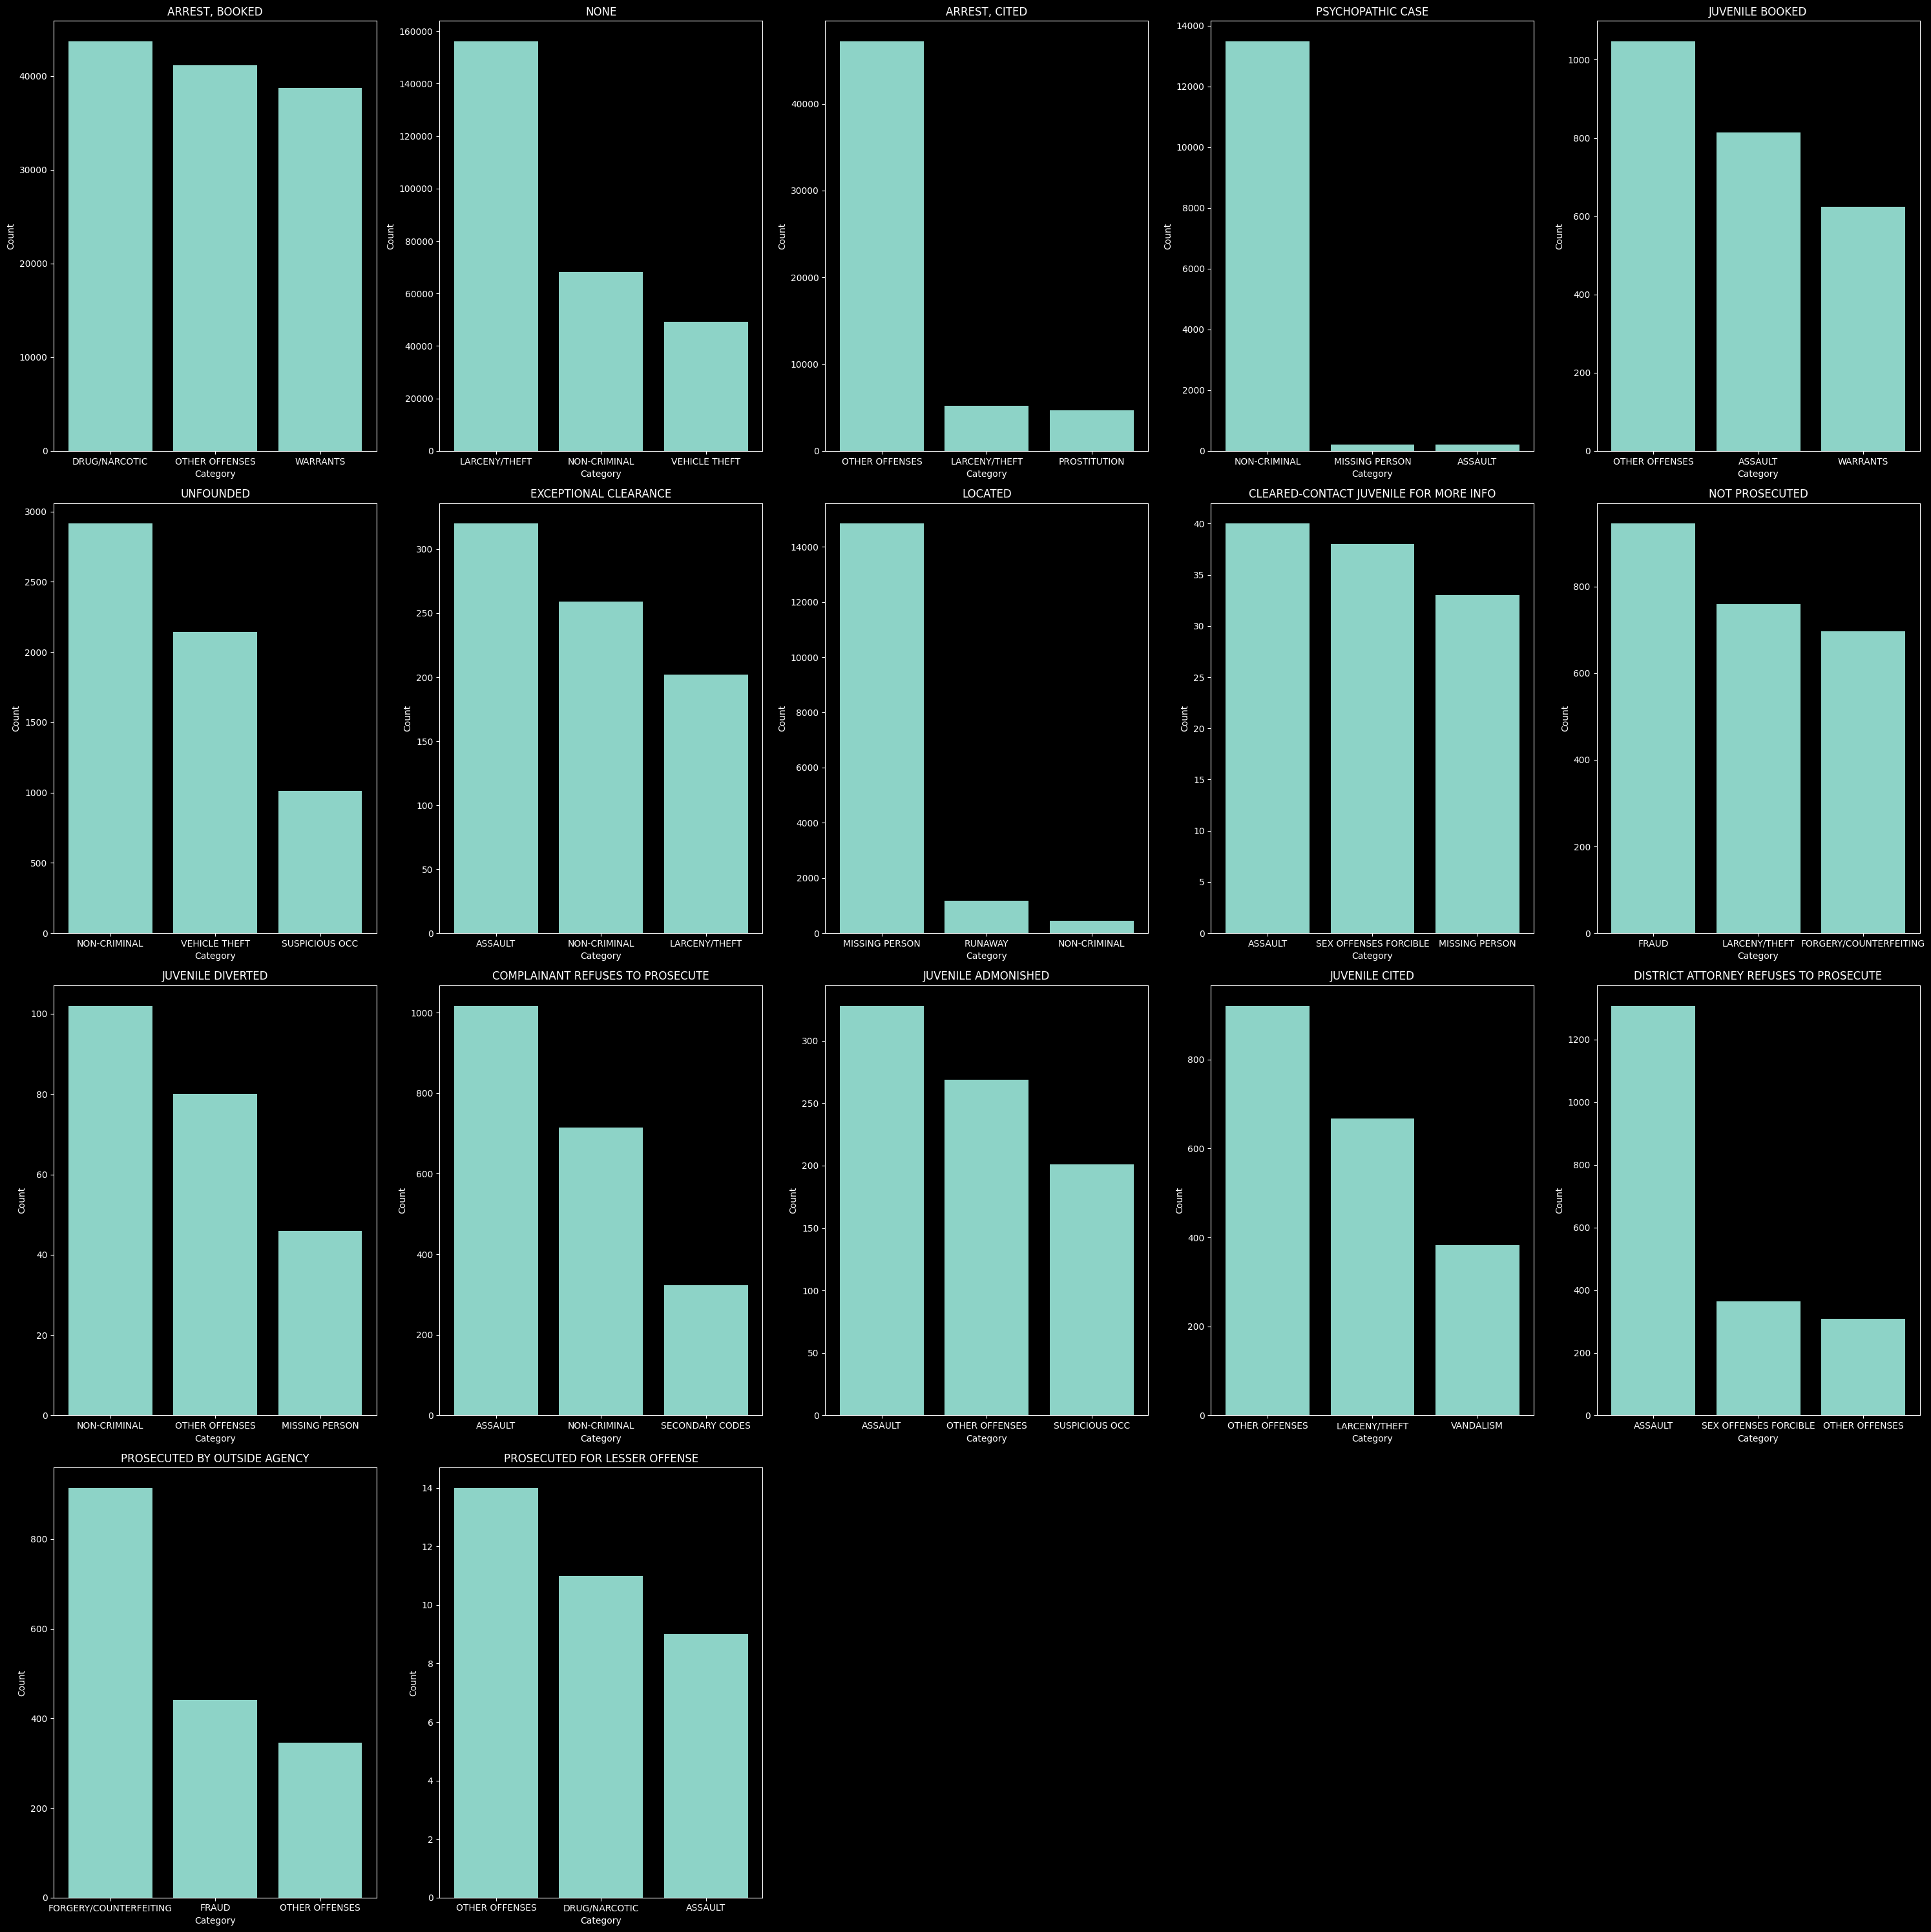

In [36]:
fig, ax = plt.subplots(4, 5, figsize=(30, 30), tight_layout=True)

top_n = 3
category_freq_by_resolution_dict = dict()

for res in df.resolution.unique():
    category_freq_by_resolution_dict[res] = df[df.resolution == res]['category'].value_counts()[:top_n]

for res, ax_i in zip( category_freq_by_resolution_dict.keys(), ax.flatten() ):
    ax_i.set_title(res)
    ax_i.set_xlabel('Category')
    ax_i.set_ylabel('Count')
        
    ax_i.bar(
        category_freq_by_resolution_dict[res].index,
        category_freq_by_resolution_dict[res].values,
        align='center'
    )

fig.delaxes(ax[3][2])
fig.delaxes(ax[3][3])
fig.delaxes(ax[3][4])

plt.savefig('categories_by_resolution.png')
plt.show()


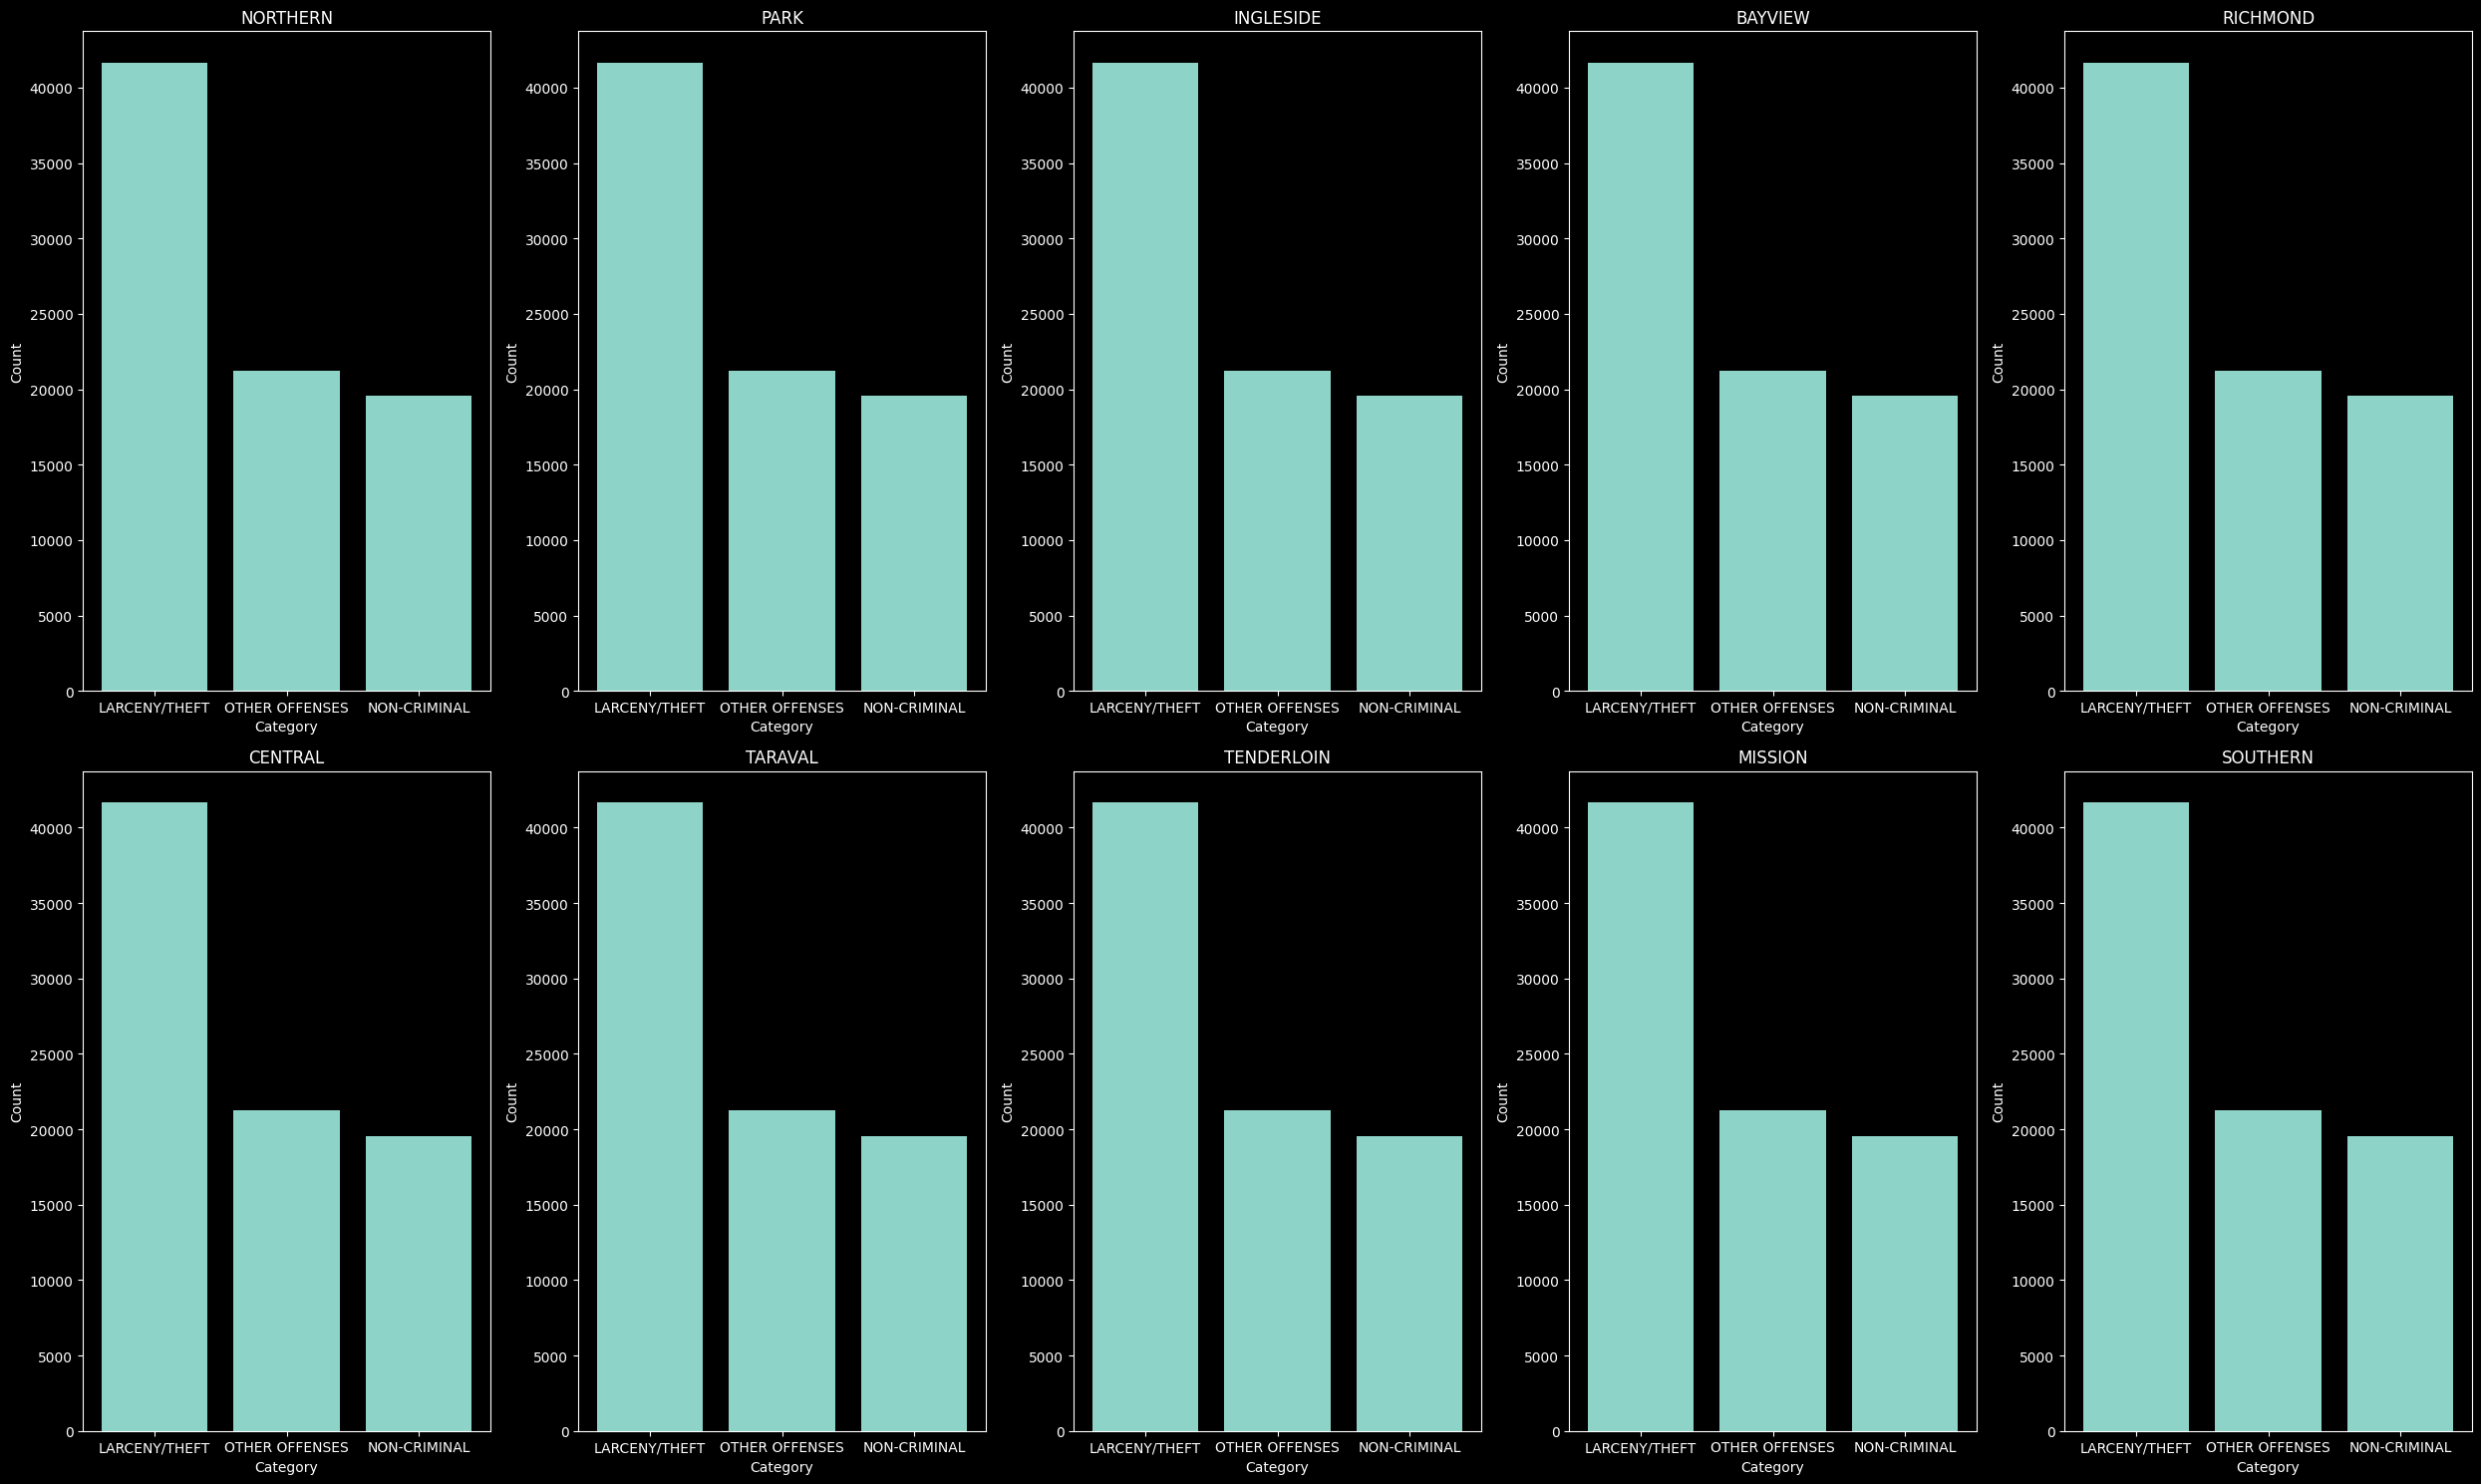

In [37]:
fig, ax = plt.subplots(2, 5, figsize=(25, 15), tight_layout=True)

top_n = 3
category_freq_by_pd_dict = dict()

for res in df.pd_district.unique():
    category_freq_by_pd_dict[res] = df[df.pd_district == res]['category'].value_counts()[:top_n]

for pd_district, ax_i in zip( category_freq_by_pd_dict.keys(), ax.flatten() ):
    ax_i.set_title(pd_district)
    ax_i.set_xlabel('Category')
    ax_i.set_ylabel('Count')
        
    ax_i.bar(
        category_freq_by_pd_dict[res].index,
        category_freq_by_pd_dict[res].values,
        align='center'
    )

plt.savefig('category_by_pd.png')
plt.show()

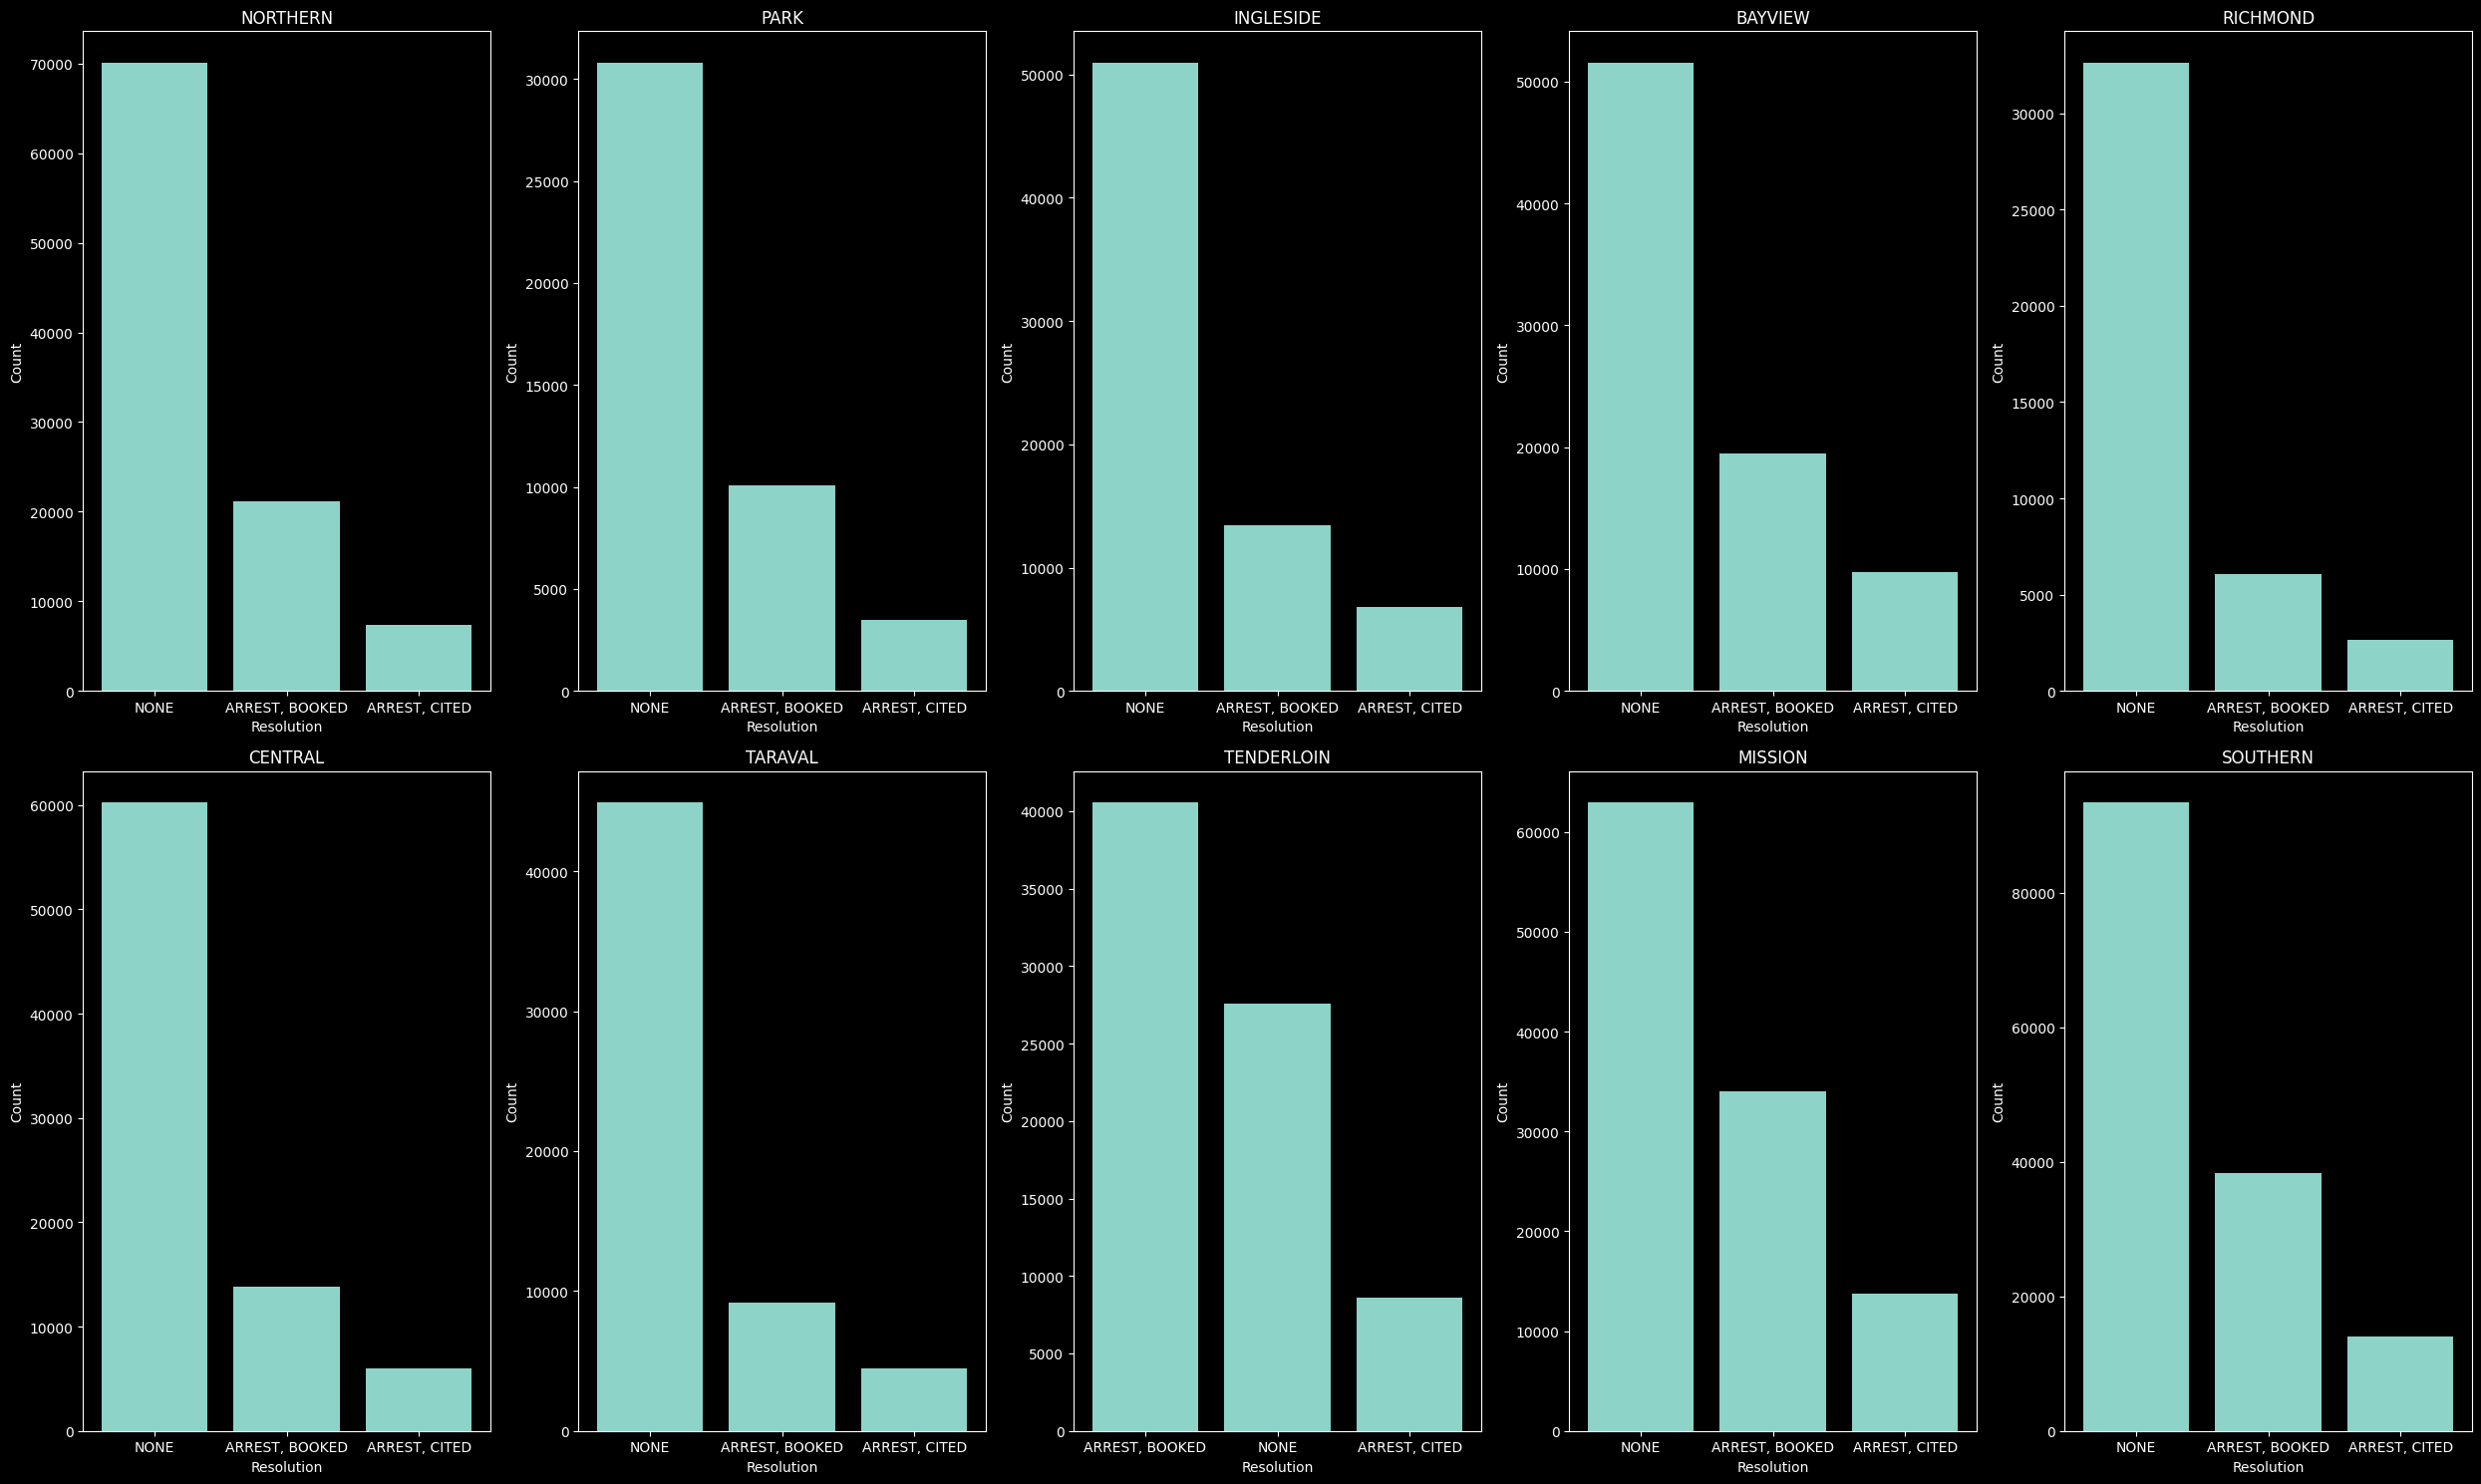

In [38]:
fig, ax = plt.subplots(2, 5, figsize=(25, 15), tight_layout=True)

top_n = 3
res_freq_by_pd_dict = dict()

for pd_district in df.pd_district.unique():
    res_freq_by_pd_dict[pd_district] = df[df.pd_district == pd_district]['resolution'].value_counts()[:top_n]

for pd_district, ax_i in zip( res_freq_by_pd_dict.keys(), ax.flatten() ):
    ax_i.set_title(pd_district)
    ax_i.set_xlabel('Resolution')
    ax_i.set_ylabel('Count')
        
    ax_i.bar(
        res_freq_by_pd_dict[pd_district].index,
        res_freq_by_pd_dict[pd_district].values,
        align='center'
    )

plt.savefig('resolution_by_pd.png')
plt.show()

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
day_of_week_enc = ord_enc.fit_transform(df['day_of_week'].values.reshape(-1, 1))

df['day_of_week'] = day_of_week_enc

In [40]:
df_sub = pd.DataFrame( df[['day_of_week', 'longitude', 'latitude', 'year', 'month', 'day_of_month', 'season', 'hour', 'minute', 'hour_type', 'category']] )
df_sub.head()

,day_of_week,longitude,latitude,year,month,day_of_month,season,hour,minute,hour_type,category
0,6.0,-122.425892,37.774599,2015,5,13,SUMMER,23,53,MID-NIGHT,WARRANTS
1,6.0,-122.425892,37.774599,2015,5,13,SUMMER,23,53,MID-NIGHT,OTHER OFFENSES
2,6.0,-122.424363,37.800414,2015,5,13,SUMMER,23,33,MID-NIGHT,OTHER OFFENSES
3,6.0,-122.426995,37.800873,2015,5,13,SUMMER,23,30,MID-NIGHT,LARCENY/THEFT
4,6.0,-122.438738,37.771541,2015,5,13,SUMMER,23,30,MID-NIGHT,LARCENY/THEFT


In [41]:
def encode_cyc_feat(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [42]:
df_sub = encode_cyc_feat(df_sub, 'day_of_week', 7)
df_sub = encode_cyc_feat(df_sub, 'day_of_month', 31)
df_sub = encode_cyc_feat(df_sub, 'month', 12)
df_sub = encode_cyc_feat(df_sub, 'hour', 24)
df_sub = encode_cyc_feat(df_sub, 'minute', 60)

In [43]:
df_sub.drop(columns=['day_of_week', 'day_of_month', 'month', 'hour', 'minute'], axis=1, inplace=True)

In [44]:
df_sub.head()

,longitude,latitude,year,season,hour_type,category,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,hour_sin,hour_cos,minute_sin,minute_cos
0,-122.425892,37.774599,2015,SUMMER,MID-NIGHT,WARRANTS,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-6.691306e-01,0.743145
1,-122.425892,37.774599,2015,SUMMER,MID-NIGHT,OTHER OFFENSES,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-6.691306e-01,0.743145
2,-122.424363,37.800414,2015,SUMMER,MID-NIGHT,OTHER OFFENSES,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-3.090170e-01,-0.951057
3,-122.426995,37.800873,2015,SUMMER,MID-NIGHT,LARCENY/THEFT,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,5.665539e-16,-1.000000
4,-122.438738,37.771541,2015,SUMMER,MID-NIGHT,LARCENY/THEFT,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,5.665539e-16,-1.000000


In [45]:
bins_num =  len(df.pd_district.value_counts()) ** 2 + 1

lat_bins = pd.cut(df_sub.latitude, bins_num, labels=[ f'lat{k}' for k in range(bins_num) ], retbins=True)
long_bins = pd.cut(df_sub.longitude, bins_num, labels=[ f'long{k}' for k in range(bins_num) ], retbins=True)

In [46]:
df_sub['geog_bins'] = [f'{lat_bins[0][row]}_{long_bins[0][row]}' for row in df_sub.index]

In [47]:
df_sub.geog_bins.value_counts()

lat0_long5        321429
lat0_long4        282005
lat0_long3        104338
lat0_long6         58663
lat0_long2         51418
lat0_long1         37616
lat0_long0         17503
lat0_long7          2687
lat100_long100        67
Name: geog_bins, dtype: int64

In [48]:
df_sub.drop(columns=['longitude', 'latitude'], axis=1, inplace=True)
df_sub.columns

Index(['year', 'season', 'hour_type', 'category', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_month_sin', 'day_of_month_cos', 'month_sin',
       'month_cos', 'hour_sin', 'hour_cos', 'minute_sin', 'minute_cos',
       'geog_bins'],
      dtype='object')

In [49]:
df_sub.head()

,year,season,hour_type,category,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,hour_sin,hour_cos,minute_sin,minute_cos,geog_bins
0,2015,SUMMER,MID-NIGHT,WARRANTS,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-6.691306e-01,0.743145,lat0_long4
1,2015,SUMMER,MID-NIGHT,OTHER OFFENSES,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-6.691306e-01,0.743145,lat0_long4
2,2015,SUMMER,MID-NIGHT,OTHER OFFENSES,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-3.090170e-01,-0.951057,lat0_long4
3,2015,SUMMER,MID-NIGHT,LARCENY/THEFT,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,5.665539e-16,-1.000000,lat0_long4
4,2015,SUMMER,MID-NIGHT,LARCENY/THEFT,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,5.665539e-16,-1.000000,lat0_long3


In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
        (OneHotEncoder(), ['season', 'hour_type', 'geog_bins']),
        remainder='passthrough', 
    )

transformed = transformer.fit_transform(df_sub)
transformed_df_sub = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df_sub.head()

,onehotencoder__season_RAINY,onehotencoder__season_SPRING,onehotencoder__season_SUMMER,onehotencoder__season_WINTER,onehotencoder__hour_type_EVENING,onehotencoder__hour_type_MID-NIGHT,onehotencoder__hour_type_MORNING,onehotencoder__hour_type_NIGHT,onehotencoder__hour_type_NOON,onehotencoder__geog_bins_lat0_long0,...,remainder__day_of_week_sin,remainder__day_of_week_cos,remainder__day_of_month_sin,remainder__day_of_month_cos,remainder__month_sin,remainder__month_cos,remainder__hour_sin,remainder__hour_cos,remainder__minute_sin,remainder__minute_cos
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-0.669131,0.743145
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-0.669131,0.743145
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-0.309017,-0.951057
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,0.0,-1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,0.0,-1.0


In [51]:
col_names = list(transformed_df_sub.columns)
idx = col_names[0].find('__')

col_name_map = { col_name: col_name[col_name.find('__') + 2:] for col_name in col_names }

list(col_name_map.items())[:5]

[('onehotencoder__season_RAINY', 'season_RAINY'),
 ('onehotencoder__season_SPRING', 'season_SPRING'),
 ('onehotencoder__season_SUMMER', 'season_SUMMER'),
 ('onehotencoder__season_WINTER', 'season_WINTER'),
 ('onehotencoder__hour_type_EVENING', 'hour_type_EVENING')]

In [52]:
transformed_df_sub.rename(columns=col_name_map, inplace=True)
transformed_df_sub.columns

Index(['season_RAINY', 'season_SPRING', 'season_SUMMER', 'season_WINTER',
       'hour_type_EVENING', 'hour_type_MID-NIGHT', 'hour_type_MORNING',
       'hour_type_NIGHT', 'hour_type_NOON', 'geog_bins_lat0_long0',
       'geog_bins_lat0_long1', 'geog_bins_lat0_long2', 'geog_bins_lat0_long3',
       'geog_bins_lat0_long4', 'geog_bins_lat0_long5', 'geog_bins_lat0_long6',
       'geog_bins_lat0_long7', 'geog_bins_lat100_long100', 'year', 'category',
       'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin',
       'day_of_month_cos', 'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
       'minute_sin', 'minute_cos'],
      dtype='object')

In [53]:
transformed_df_sub.head()

,season_RAINY,season_SPRING,season_SUMMER,season_WINTER,hour_type_EVENING,hour_type_MID-NIGHT,hour_type_MORNING,hour_type_NIGHT,hour_type_NOON,geog_bins_lat0_long0,...,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,hour_sin,hour_cos,minute_sin,minute_cos
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-0.669131,0.743145
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-0.669131,0.743145
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,-0.309017,-0.951057
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,0.0,-1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.781831,0.62349,0.485302,-0.874347,0.5,-0.866025,-0.258819,0.965926,0.0,-1.0


In [54]:
numeric_feats = [ var_name for var_name in transformed_df_sub.columns if '_sin' in var_name or '_cos' in var_name ]
numeric_feats

['day_of_week_sin',
 'day_of_week_cos',
 'day_of_month_sin',
 'day_of_month_cos',
 'month_sin',
 'month_cos',
 'hour_sin',
 'hour_cos',
 'minute_sin',
 'minute_cos']

In [55]:
from sklearn.preprocessing import StandardScaler

for var_name in numeric_feats:
    transformed_df_sub[var_name] = StandardScaler().fit_transform(transformed_df_sub[var_name].values.reshape(-1, 1))

In [56]:
transformed_df_sub.head()

,season_RAINY,season_SPRING,season_SUMMER,season_WINTER,hour_type_EVENING,hour_type_MID-NIGHT,hour_type_MORNING,hour_type_NIGHT,hour_type_NOON,geog_bins_lat0_long0,...,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,hour_sin,hour_cos,minute_sin,minute_cos
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.094499,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-1.185324,0.693704
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.094499,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-1.185324,0.693704
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.094499,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-0.548264,-1.414145
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.094499,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-0.001596,-1.475039
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.094499,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-0.001596,-1.475039


In [57]:
transformed_df_sub['category_ord_enc'] = OrdinalEncoder().fit_transform(transformed_df_sub['category'].values.reshape(-1, 1)).astype(dtype=int)

In [58]:
transformed_df_sub.head()

,season_RAINY,season_SPRING,season_SUMMER,season_WINTER,hour_type_EVENING,hour_type_MID-NIGHT,hour_type_MORNING,hour_type_NIGHT,hour_type_NOON,geog_bins_lat0_long0,...,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos,hour_sin,hour_cos,minute_sin,minute_cos,category_ord_enc
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-1.185324,0.693704,37
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-1.185324,0.693704,21
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-0.548264,-1.414145,21
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-0.001596,-1.475039,16
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.854992,0.671209,-1.221854,0.686507,-1.223875,-0.035186,1.445818,-0.001596,-1.475039,16


<AxesSubplot:>

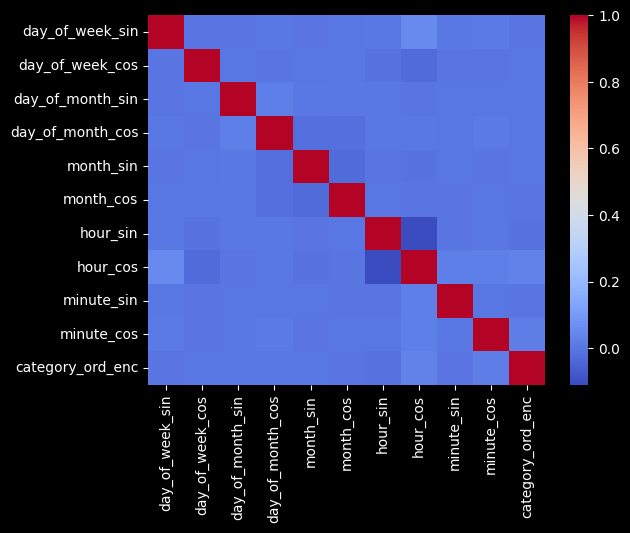

In [59]:
sns.heatmap(transformed_df_sub.corr(), cmap='coolwarm')

In [39]:
#transformed_df_sub.drop(columns=['category'], axis=1, inplace=True)

In [40]:
transformed_df_sub.to_csv('sf_crimes.csv', index=False)